# Predicting UFC Winners

## Overview

## Business Problem

## Data Understanding

In [1]:
# Importing everything needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, ConfusionMatrixDisplay, 
recall_score, confusion_matrix, precision_score, make_scorer)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import pickle

In [2]:
# Read in the data and display a preview
df = pd.read_csv('../data/ufc-master.csv')
df.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,...,Punch,1.0,1:20,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0
4,Joe Solecki,Jared Gordon,-135.0,115,74.074074,115.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,165.0,200.0,400.0,1200.0,900.0,600.0


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 119 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   R_fighter                     object 
 1   B_fighter                     object 
 2   R_odds                        float64
 3   B_odds                        int64  
 4   R_ev                          float64
 5   B_ev                          float64
 6   date                          object 
 7   location                      object 
 8   country                       object 
 9   Winner                        object 
 10  title_bout                    bool   
 11  weight_class                  object 
 12  gender                        object 
 13  no_of_rounds                  int64  
 14  B_current_lose_streak         int64  
 15  B_current_win_streak          int64  
 16  B_draw                        int64  
 17  B_avg_SIG_STR_landed          float64
 18  B_avg_SIG_STR_pct          

In [4]:
df.describe()

,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,...,B_Flyweight_rank,B_Pound-for-Pound_rank,finish_round,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
count,4895.000000,4896.000000,4895.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,3966.000000,4131.000000,...,95.000000,35.000000,4274.000000,4274.000000,4093.000000,4077.000000,3847.000000,3835.000000,3847.000000,3834.000000
mean,-117.640449,66.030637,94.827397,167.083323,3.181985,0.477941,0.875408,0.010621,26.308553,0.444741,...,8.473684,9.485714,2.408049,652.313758,294.064745,416.544027,843.010138,1064.543155,514.231869,647.257173
std,268.881452,247.803928,82.843409,136.944643,0.571515,0.769386,1.311379,0.108333,20.935885,0.121332,...,4.259763,4.300283,0.996643,357.911423,230.583958,306.571299,550.126761,627.285034,413.622768,458.846643
min,-1700.000000,-1200.000000,5.882353,8.333333,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,5.000000,-440.000000,-200.000000,-370.000000,-1250.000000,-550.000000,-275.000000
25%,-255.000000,-145.000000,39.215686,68.965517,3.000000,0.000000,0.000000,0.000000,5.610000,0.387500,...,5.000000,5.000000,1.000000,297.000000,167.000000,225.000000,435.000000,590.000000,240.000000,325.000000
50%,-150.000000,130.000000,66.666667,130.000000,3.000000,0.000000,0.000000,0.000000,24.759615,0.450000,...,8.000000,10.000000,3.000000,900.000000,250.000000,349.000000,720.000000,975.000000,435.000000,548.500000
75%,126.500000,220.000000,126.500000,220.000000,3.000000,1.000000,1.000000,0.000000,39.075000,0.510000,...,12.000000,13.500000,3.000000,900.000000,400.000000,525.000000,1200.000000,1400.000000,700.000000,880.750000
max,775.000000,1300.000000,775.000000,1300.000000,5.000000,6.000000,12.000000,2.000000,154.000000,1.000000,...,15.000000,15.000000,5.000000,1500.000000,2200.000000,2600.000000,4665.000000,4785.000000,2675.000000,3200.000000


In [5]:
df.shape

(4896, 119)

## Data Preparation

I want to change date column to a datetime object but they are in different formats

In [6]:
df['date']

0       2021-10-02
1       2021-10-02
2       2021-10-02
3       2021-10-02
4       2021-10-02
           ...    
4891     3/21/2010
4892     3/21/2010
4893     3/21/2010
4894     3/21/2010
4895     3/21/2010
Name: date, Length: 4896, dtype: object

Needed to make sure all of them were separated by the same sign.

In [7]:
# Changing all / to - in date column
df['date'] = df['date'].str.replace('/', '-')

The first 58 dates were in a different format. They had year-month-day instead of month-day-year.

In [8]:
df['date'][:59]

0     2021-10-02
1     2021-10-02
2     2021-10-02
3     2021-10-02
4     2021-10-02
5     2021-10-02
6     2021-10-02
7     2021-10-02
8     2021-10-02
9     2021-10-02
10    2021-10-02
11    2021-09-25
12    2021-09-25
13    2021-09-25
14    2021-09-25
15    2021-09-25
16    2021-09-25
17    2021-09-25
18    2021-09-25
19    2021-09-25
20    2021-09-25
21    2021-09-25
22    2021-09-25
23    2021-09-25
24    2021-09-18
25    2021-09-18
26    2021-09-18
27    2021-09-18
28    2021-09-18
29    2021-09-18
30    2021-09-18
31    2021-09-18
32    2021-09-18
33    2021-09-18
34    2021-09-18
35    2021-09-18
36    2021-09-18
37    2021-09-04
38    2021-09-04
39    2021-09-04
40    2021-09-04
41    2021-09-04
42    2021-09-04
43    2021-09-04
44    2021-09-04
45    2021-09-04
46    2021-08-28
47    2021-08-28
48    2021-08-28
49    2021-08-28
50    2021-08-28
51    2021-08-28
52    2021-08-28
53    2021-08-28
54    2021-08-28
55    2021-08-28
56    2021-08-28
57    2021-08-28
58     8-21-20

Wrote a for loop that goes through each row in the `date` column and rearranges the strings by slicing. After this I was able to change the data type.

In [9]:
# Only want to change the first 58 values
for x in range(58):
    # Accessing each value in date column
    string = df.loc[x, 'date']
    # Slicing to get day, month, and year separated
    day = string[8:]
    month = string[5:7]
    year = string[:4]
    # Moving components around to get month-day-year format
    new_format = month + '-' + day + '-' + year
    # Update the DataFrame
    df.loc[x, 'date'] = new_format

Changed the data type to a datetime object

In [10]:
# Converting column to datetime from object
df['date'] = pd.to_datetime(df['date'], format='%m-%d-%Y')

After I changed the data type of the `date` column I decided to explore null values.

In [11]:
# Checking columns with nulls
df.isna().sum()

R_fighter        0
B_fighter        0
R_odds           1
B_odds           0
R_ev             1
              ... 
b_dec_odds     819
r_sub_odds    1049
b_sub_odds    1061
r_ko_odds     1049
b_ko_odds     1062
Length: 119, dtype: int64

There are a lot of nulls in the columns below because only 10 fighters in each weightclass are ranked at any given moment in time. This means majority of fighters do not have a rank. It is also rare for a nonranked fighter to fight a ranked fighter. I don't think these columns add value so I am comfortable dropping them and getting rid of all those null values they hold.

In [12]:
# Looking of list of columns with the most null values
nulls = df.isna().sum()
nulls.sort_values(ascending=False)[:30]

B_Women's Featherweight_rank    4896
R_Women's Featherweight_rank    4889
B_Pound-for-Pound_rank          4861
B_Women's Flyweight_rank        4852
R_Women's Flyweight_rank        4837
B_Women's Strawweight_rank      4835
B_Women's Bantamweight_rank     4818
B_Bantamweight_rank             4811
B_Lightweight_rank              4809
B_Welterweight_rank             4807
B_Featherweight_rank            4806
B_Light Heavyweight_rank        4803
B_Flyweight_rank                4801
B_Middleweight_rank             4794
R_Women's Strawweight_rank      4792
B_Heavyweight_rank              4786
R_Women's Bantamweight_rank     4778
R_Featherweight_rank            4763
R_Middleweight_rank             4762
R_Bantamweight_rank             4759
R_Lightweight_rank              4757
R_Welterweight_rank             4756
R_Light Heavyweight_rank        4755
R_Heavyweight_rank              4754
R_Flyweight_rank                4754
R_Pound-for-Pound_rank          4730
B_match_weightclass_rank        4019
R

I will also get rid of the column `finish_details` because it has over 1000 nulls.

In [13]:
# Creating list of all columns to drop
columns_to_drop = list(nulls.sort_values(ascending=False)[:29].index)
columns_to_drop

["B_Women's Featherweight_rank",
 "R_Women's Featherweight_rank",
 'B_Pound-for-Pound_rank',
 "B_Women's Flyweight_rank",
 "R_Women's Flyweight_rank",
 "B_Women's Strawweight_rank",
 "B_Women's Bantamweight_rank",
 'B_Bantamweight_rank',
 'B_Lightweight_rank',
 'B_Welterweight_rank',
 'B_Featherweight_rank',
 'B_Light Heavyweight_rank',
 'B_Flyweight_rank',
 'B_Middleweight_rank',
 "R_Women's Strawweight_rank",
 'B_Heavyweight_rank',
 "R_Women's Bantamweight_rank",
 'R_Featherweight_rank',
 'R_Middleweight_rank',
 'R_Bantamweight_rank',
 'R_Lightweight_rank',
 'R_Welterweight_rank',
 'R_Light Heavyweight_rank',
 'R_Heavyweight_rank',
 'R_Flyweight_rank',
 'R_Pound-for-Pound_rank',
 'B_match_weightclass_rank',
 'R_match_weightclass_rank',
 'finish_details']

In [14]:
# Dropping the selected columns
df.drop(columns_to_drop, axis=1, inplace=True)

In [15]:
# Looking of list of columns with the most null values
nulls2 = df.isna().sum()
nulls2.sort_values(ascending=False)

b_ko_odds                      1062
b_sub_odds                     1061
r_ko_odds                      1049
r_sub_odds                     1049
B_avg_SIG_STR_landed            930
                               ... 
R_win_by_Decision_Split           0
R_win_by_Decision_Unanimous       0
R_win_by_KO/TKO                   0
R_win_by_Submission               0
R_fighter                         0
Length: 90, dtype: int64

I was comfortable dropping the rest of the nulls in the dataset because I still had a lot of data to work with and I thought these columns with the most nulls would be vital features for modeling.

In [16]:
# Dropping the rest of the null values
clean_df = df.dropna()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2615 entries, 0 to 4286
Data columns (total 90 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   R_fighter                     2615 non-null   object        
 1   B_fighter                     2615 non-null   object        
 2   R_odds                        2615 non-null   float64       
 3   B_odds                        2615 non-null   int64         
 4   R_ev                          2615 non-null   float64       
 5   B_ev                          2615 non-null   float64       
 6   date                          2615 non-null   datetime64[ns]
 7   location                      2615 non-null   object        
 8   country                       2615 non-null   object        
 9   Winner                        2615 non-null   object        
 10  title_bout                    2615 non-null   bool          
 11  weight_class                  

I needed to know if the winner of the fight is the underdog or the favorite. The data had this column listed as the 'Red' or 'Blue' fighter. I used the `B_odds` and `R_odds` to discover which fighter the underdog was. Then created two new columns `underdog` and `favored`. These contained the names of the fighters. Then was able to replace 'Red' or 'Blue' in the `Winner` column with either 'underdog' or 'favored'.

In [17]:
clean_df['Winner'].value_counts()

Red     1513
Blue    1102
Name: Winner, dtype: int64

In [18]:
# Creating a column that has the name of the underdog by looking at the odds columns
clean_df['underdog'] = clean_df.apply(
    lambda row: row['R_fighter'] if row['R_odds'] > row['B_odds'] else row['B_fighter'], axis=1)
# Creating a column that has the name of the favored fighter by looking at the odds columns
clean_df['favored'] = clean_df.apply(
    lambda row: row['R_fighter'] if row['R_odds'] < row['B_odds'] else row['B_fighter'], axis=1)

<ipython-input-18-f1a5e82c79dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['underdog'] = clean_df.apply(
<ipython-input-18-f1a5e82c79dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['favored'] = clean_df.apply(


In [19]:
# Changing Red winners to either underdog or favored
clean_df.loc[(clean_df['Winner'] == 'Red') & (clean_df['R_fighter'] == clean_df['underdog']), 'Winner'] = 'underdog'
clean_df.loc[(clean_df['Winner'] == 'Red') & (clean_df['R_fighter'] != clean_df['underdog']), 'Winner'] = 'favored'
# Changing Blue winners to either underdog or favored
clean_df.loc[(clean_df['Winner'] == 'Blue') & (clean_df['B_fighter'] == clean_df['underdog']), 'Winner'] = 'underdog'
clean_df.loc[(clean_df['Winner'] == 'Blue') & (clean_df['B_fighter'] != clean_df['underdog']), 'Winner'] = 'favored'

C:\Users\42ben\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [20]:
clean_df['Winner'].value_counts(normalize=True)

favored     0.640918
underdog    0.359082
Name: Winner, dtype: float64

Because I got rid of a lot of rows due to them containing null values I wanted to see if I created a larger class imbalance than what already existed within the whole dataset. After looking at the full dataset it contains almost the exact same percentage of underdog and favored winners.

In [21]:
# Dropping any nulls that would affect making the changes made below
df['R_odds'].dropna(inplace=True)
df['B_odds'].dropna(inplace=True)
df['R_fighter'].dropna(inplace=True)
df['B_fighter'].dropna(inplace=True)

# Creating a column that has the name of the underdog by looking at the odds columns
df['underdog'] = df.apply(
    lambda row: row['R_fighter'] if row['R_odds'] > row['B_odds'] else row['B_fighter'], axis=1)
# Creating a column that has the name of the favored fighter by looking at the odds columns
df['favored'] = df.apply(
    lambda row: row['R_fighter'] if row['R_odds'] < row['B_odds'] else row['B_fighter'], axis=1)

# Changing Red winners to either underdog or favored
df.loc[(df['Winner'] == 'Red') & (df['R_fighter'] == df['underdog']), 'Winner'] = 'underdog'
df.loc[(df['Winner'] == 'Red') & (df['R_fighter'] != df['underdog']), 'Winner'] = 'favored'
# Changing Blue winners to either underdog or favored
df.loc[(df['Winner'] == 'Blue') & (df['B_fighter'] == df['underdog']), 'Winner'] = 'underdog'
df.loc[(df['Winner'] == 'Blue') & (df['B_fighter'] != df['underdog']), 'Winner'] = 'favored'

df['Winner'].value_counts(normalize=True)

favored     0.652982
underdog    0.347018
Name: Winner, dtype: float64

Running a .corr() in order to see which features are the most correlated with the target column. After inspecting the table these are the features I decided to use for my first models:
- `B_odds`
- `R_odds`
- `B_win_by_Decision_Split`
- `B_win_by_Decision_Unanimous`
- `win_streak_dif`
- `loss_dif`
- `reach_dif`
- `age_dif`
- `r_dec_odds`
- `b_dec_odds`
- `b_sub_odds`
- `r_ko_odds`
- `b_ko_odds`

In [22]:
# Creating a copy of clean_df
correlation = clean_df.copy()
# Changing 'Winner' to numeric data
correlation['Winner'] = correlation['Winner'].map({'favored': 0, 'underdog': 1})
# Changing Stance columns for each fighter to numeric data
correlation['R_Stance'] = correlation['R_Stance'].map({'Orthodox': 0, 'Southpaw': 1, 'Switch': 2})
correlation['B_Stance'] = correlation['B_Stance'].map({'Orthodox': 0, 'Southpaw': 1, 'Switch': 2})
# Running .corr on table
correlation.corr()

,R_odds,B_odds,R_ev,B_ev,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,...,empty_arena,constant_1,finish_round,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
R_odds,1.000000,-0.969696,0.820485,-0.936470,0.137393,-0.193818,-0.157417,-0.027434,0.024014,0.010812,...,-0.000842,NaN,-0.036908,-0.019921,0.356514,-0.675676,0.324984,-0.392236,0.508780,-0.601083
B_odds,-0.969696,1.000000,-0.878323,0.892632,-0.120096,0.174785,0.152741,0.036489,-0.035938,-0.006048,...,-0.009896,NaN,0.035872,0.020138,-0.395906,0.640760,-0.338724,0.382485,-0.531917,0.586146
R_ev,0.820485,-0.878323,1.000000,-0.639952,0.029789,-0.116346,-0.117465,-0.043147,0.046130,-0.008782,...,-0.028255,NaN,-0.053456,-0.048283,0.463268,-0.466056,0.345334,-0.303920,0.532878,-0.476202
B_ev,-0.936470,0.892632,-0.639952,1.000000,-0.177425,0.214087,0.171286,0.010087,-0.008161,-0.024703,...,-0.039891,NaN,0.019696,-0.002098,-0.267131,0.715850,-0.281088,0.397651,-0.445476,0.596425
Winner,0.137393,-0.120096,0.029789,-0.177425,1.000000,-0.033924,0.004655,0.003142,0.008900,0.030676,...,-0.022019,NaN,0.001515,0.000013,0.034843,-0.098497,-0.004560,-0.057562,0.058426,-0.118841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b_dec_odds,-0.675676,0.640760,-0.466056,0.715850,-0.098497,0.264454,0.307118,-0.013570,0.020783,-0.044774,...,-0.034307,NaN,-0.016122,-0.055197,0.074246,1.000000,-0.194874,0.300780,-0.483733,0.190382
r_sub_odds,0.324984,-0.338724,0.345334,-0.281088,-0.004560,-0.028571,0.023407,-0.006109,0.055771,0.022911,...,0.017766,NaN,0.020821,0.021710,0.141541,-0.194874,1.000000,-0.315952,-0.074263,-0.132230
b_sub_odds,-0.392236,0.382485,-0.303920,0.397651,-0.057562,0.143187,0.154065,-0.002178,0.048102,-0.003676,...,0.022419,NaN,0.034464,0.017958,-0.070957,0.300780,-0.315952,1.000000,-0.117192,0.024339
r_ko_odds,0.508780,-0.531917,0.532878,-0.445476,0.058426,-0.149433,-0.227844,-0.032786,-0.004365,0.035661,...,-0.030776,NaN,0.018983,0.046386,-0.059935,-0.483733,-0.074263,-0.117192,1.000000,-0.211696


I ran .value_counts() on all columns to make sure all data looked valid. 

In [23]:
clean_df['no_of_rounds'].value_counts()

3    2294
5     320
4       1
Name: no_of_rounds, dtype: int64

Dropped this row because there is no such thing as a 4 round fight. They are either 3 or 5 rounds long.

In [24]:
# Dropping the row
clean_df.drop(clean_df.loc[clean_df['no_of_rounds'] == 4].index, inplace=True)

C:\Users\42ben\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Completed data cleaning and performed a train/test split. All features were numeric.

In [25]:
# Setting all wanted features equal to X
X = clean_df[['B_odds', 'R_odds', 'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous',
                    'win_streak_dif', 'loss_dif', 'reach_dif', 'age_dif', 'r_dec_odds', 'b_dec_odds',
                  'b_sub_odds', 'r_ko_odds', 'b_ko_odds']]
# Setting target equal to y
y = clean_df['Winner']
# Performing the train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=333)

## Modeling

## Evaluation

A dummy model would pick the underdog every time and be correct about 36% of the time. This also displays an expected yet slight class imbalance, nothing dramatic.

In [26]:
y_train.value_counts(normalize=True)

favored     0.637245
underdog    0.362755
Name: Winner, dtype: float64

### First Model (Random Forest)
For my first model created a random forest with all default hyperparameters to see if it would over fit to the training data and score a perfect 1.0 

In [27]:
# Creating steps for a Pipeline
forest_steps = [('scaler', StandardScaler()),
             ('forest', RandomForestClassifier(random_state=333))]
# Creating Pipeline with steps
forest_pipe = Pipeline(forest_steps)
# Fitting the training data to the Pipeline
forest_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('forest', RandomForestClassifier(random_state=333))])

It did get a perfect score on the training data which gives me confidence I'm working with data that is capable of creating a sufficient model.

In [28]:
# Defining the predictions from the Pipeline using the training data
y_pred = forest_pipe.predict(X_train)
# Evaluating the accuracy score on the training data
accuracy_score(y_train, y_pred), precision_score(y_train, y_pred, pos_label='underdog')

(1.0, 1.0)

The cross validation accuracy score is pretty good for a first model with all default hyperparameters. It is about 20% higher than the dummy model.

In [29]:
# Calculating mean of the 5-fold cross_val_score on accuracy
cross_val_score(forest_pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.6137755102040816

I made a custom scorer for precision to use when cross validating because this is the metric I'm mostly concerned with.

In [30]:
# Making a custom scorer for precision
precision_scorer = make_scorer(precision_score, pos_label='underdog')

This precision score is also not too bad for the first model at 41%

In [31]:
# Calculating mean of the 5-fold cross_val_score on precision
cross_val_score(forest_pipe, X_train, y_train, cv=5, scoring=precision_scorer).mean()

0.43526394664077506

### Random Forest 2nd iteration (Using GridSearch)

Created a GridSearch to try and improve precision score by tweaking the hyperparameters of the random forest. It is overfit so limiting the max_depth was a priority. There is a slight class imbalance so I tried changing the weights. Criterion and n_estimators were also of interest.

In [32]:
# # Creating parameters for GridSearch
# forest_params = {'forest__n_estimators': [50, 100, 150],
#                 'forest__max_depth': [5, 50, 100],
#                 'forest__class_weight': ['balanced', None],
#                 'forest__criterion': ['gini', 'entropy', 'log_loss']}
# # GridSearch with the random forest pipeline, parameters above, 5 fold cross validation, and precision score
# forest_grid = GridSearchCV(estimator=forest_pipe, param_grid=forest_params, cv=5, scoring=precision_scorer, n_jobs=3)
# # Fitting the GridSearch
# forest_grid.fit(X_train, y_train)

# # Pickling model
# with open('pickles/forest_grid_best.pkl', 'wb') as f:
#      pickle.dump(forest_grid.best_estimator_, f)

Pickled this model because it can take long.

In [33]:
# Loading in pickled model
with open('../pickles/forest_grid_best.pkl', 'rb') as f:
    forest_grid_best = pickle.load(f)

I wrote a function in order to get results from GridSearches more efficiently.

In [34]:
# Defining function to print the best estimator from GridSearch along with the precision score
def best_results(best_estimator):
    # Printing best estimator from GridSearch
    print(f"Best Model: ", best_estimator, f"\n")
    # Printing CV precision score from best estimator
    print(f"CV Precision Score: ", cross_val_score(best_estimator, X=X_train, y=y_train, cv=5, scoring=precision_scorer,
                                                  n_jobs=3).mean(), f"\n")
    # Defining y_pred
    y_pred = best_estimator.predict(X_train)
    # Printing the training precision score
    print(f"Training Precision Score: ", precision_score(y_train, y_pred, pos_label='underdog'))
    
    # Creating confusion matrix from training data
    cf = confusion_matrix(y_train, y_pred)
    ConfusionMatrixDisplay(cf, display_labels=['favored', 'underdog']).plot(cmap=plt.cm.copper)

The GridSearch found n_estimators=150, max_depth=50, default class weights, and criterion='entropy' returned the best precision score. It improved quite dramtically for the first GridSearch. Precision went up by approximately 8%. This model is still very overfit to the training data.

Best Model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('forest',
                 RandomForestClassifier(criterion='entropy', max_depth=50,
                                        n_estimators=150, random_state=333))]) 

CV Precision Score:  0.49200305906061487 

Training Precision Score:  1.0


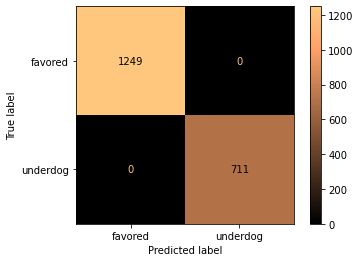

In [35]:
best_results(forest_grid_best)

### Random Forest 3rd iteration (Using GridSearch)

Tried to improve results with a new GridSearch based on the results from the previous GridSearch.

In [36]:
# # Creating parameters for GridSearch
# forest_params2 = {'forest__n_estimators': [140, 150, 160],
#                  'forest__max_depth': [45, 50, 75],
#                  'forest__class_weight': [{'favored': 1, 'underdog': 2}, None],
#                  'forest__criterion': ['gini', 'entropy', 'log_loss']}
# # GridSearch with the random forest pipeline, parameters above, 5 fold cross validation, and precision score
# forest_grid2 = GridSearchCV(estimator=forest_pipe, param_grid=forest_params2, cv=5, scoring=precision_scorer, n_jobs=3)
# # Fitting the GridSearch
# forest_grid2.fit(X_train, y_train)

# # Pickling model
# with open('pickles/forest_grid_best2.pkl', 'wb') as f:
#      pickle.dump(forest_grid2.best_estimator_, f)

Pickled this model because it can take long.

In [37]:
# Loading in pickled model
with open('../pickles/forest_grid_best2.pkl', 'rb') as f:
    forest_grid_best2 = pickle.load(f)

The only difference from this GridSearch was it picked a max_depth of 45 instead of 50 but the results were virtually the same. It is still very overfit and scoring perfectly on the training data.

Best Model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('forest',
                 RandomForestClassifier(criterion='entropy', max_depth=45,
                                        n_estimators=150, random_state=333))]) 

CV Precision Score:  0.49200305906061487 

Training Precision Score:  1.0


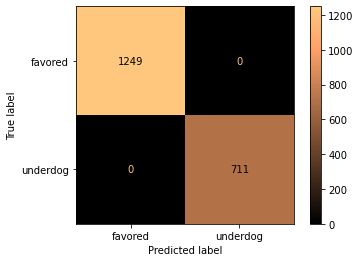

In [38]:
best_results(forest_grid_best2)

### Random Forest with PCA
One way to help with an overfit model is to reduce dimensionality. I decided to do this by adding PCA into a new pipeline for a random forest model.

In [39]:
# Creating steps for a Pipeline w/ PCA
pca_forest_steps = [('scaler', StandardScaler()),
                    ('pca', PCA()),
                    ('forest', RandomForestClassifier(random_state=333))]
# Creating Pipeline with steps
pca_forest_pipe = Pipeline(pca_forest_steps)
# Fitting the training data to the Pipeline
pca_forest_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('forest', RandomForestClassifier(random_state=333))])

I set the GridSearch to search through a wide variety of hyperparameters. This included defualt settings and what worked well for the random forest without PCA plus some other values to see what works best now that PCA is being used. For n_components in PCA I used a very wide range because I didn't know how much I should reduce the complexity.

In [40]:
# # Creating parameters for GridSearch w/ PCA
# forest_params3 = {'pca__n_components': [2, 0.8, 0.9],
#                   'forest__n_estimators': [50, 100, 150],
#                   'forest__max_depth': [5, 50, 100],
#                   'forest__class_weight': ['balanced', None],
#                   'forest__criterion': ['gini', 'entropy', 'log_loss']}
# # GridSearch with the random forest pipeline, parameters above, 5 fold cross validation, and precision score
# forest_grid3 = GridSearchCV(estimator=pca_forest_pipe, param_grid=forest_params3, cv=5, scoring=precision_scorer, n_jobs=3)
# # Fitting the GridSearch
# forest_grid3.fit(X_train, y_train)

# # Pickling model
# with open('pickles/forest_grid_best3.pkl', 'wb') as f:
#      pickle.dump(forest_grid3.best_estimator_, f)

Pickled this model because it can take long.

In [41]:
# Loading in pickled model
with open('../pickles/forest_grid_best3.pkl', 'rb') as f:
    forest_grid_best3 = pickle.load(f)

This increased the precision score by about 11%! It now earned a precision score of 60%. This model is less overfit than the random forest models without PCA. It is still noticeably overfit.

Best Model:  Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('forest',
                 RandomForestClassifier(criterion='entropy', max_depth=5,
                                        random_state=333))]) 

CV Precision Score:  0.6 

Training Precision Score:  0.9


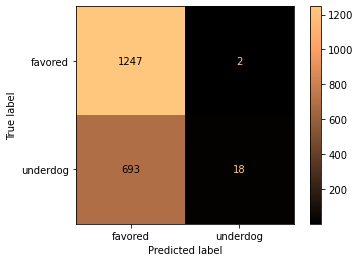

In [42]:
best_results(forest_grid_best3)

I looked at the weights associated with all features within the two components in order to retrieve information on feature importance. 
In the first component the features with the heaviest weights are:

 - `B_odds`
 - `R_odds`
 - `age_dif`
 - `b_dec_odds`
 - `r_ko_odds`
 - `b_ko_odds`
 
In the second component the features with the heaviest weights are:

 - `B_win_by_Decision_Split`
 - `B_win_by_Decision_Unanimous`
 - `loss_dif`
 - `r_dec_odds`
 - `b_dec_odds`

In [43]:
forest_grid_best3.named_steps['pca'].components_

array([[ 0.48216837, -0.48244519,  0.08104853,  0.05725292, -0.18076274,
        -0.20780097, -0.09251538, -0.22119506, -0.19191591,  0.3501079 ,
         0.21471459, -0.29551187,  0.3142195 ],
       [-0.06332669,  0.0816488 ,  0.48564759,  0.49429965,  0.08964384,
        -0.32059116, -0.09015838, -0.18919759, -0.33355674, -0.39703797,
        -0.0648606 ,  0.22205341,  0.1788425 ]])

### Random Forest with PCA 2nd Iteration
Updated pipeline with hyperparamers that have consistently been the best. Criterion='entropy' and default class weight.

In [44]:
# Creating steps for a Pipeline w/ PCA
pca_forest_steps = [('scaler', StandardScaler()),
                    ('pca', PCA()),
                    ('forest', RandomForestClassifier(random_state=333, criterion='entropy'))]
# Creating Pipeline with steps
pca_forest_pipe = Pipeline(pca_forest_steps)
# Fitting the training data to the Pipeline
pca_forest_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('forest',
                 RandomForestClassifier(criterion='entropy',
                                        random_state=333))])

Tried to increase the results with new GridSearch. No longer using GridSearch for criterion or class weight.

In [45]:
# # Creating parameters for GridSearch w/ PCA
# forest_params4 = {'pca__n_components': [2, 3],
#                   'forest__n_estimators': [99, 100, 101],
#                   'forest__max_depth': [4, 5, 6]}
# # GridSearch with the random forest pipeline, parameters above, 5 fold cross validation, and precision score
# forest_grid4 = GridSearchCV(estimator=pca_forest_pipe, param_grid=forest_params4, cv=5, scoring=precision_scorer, n_jobs=3)
# # Fitting the GridSearch
# forest_grid4.fit(X_train, y_train)

# with open('pickles/forest_grid_best4.pkl', 'wb') as f:
#      pickle.dump(forest_grid4.best_estimator_, f)

Pickled this model because it can take long.

In [46]:
# Loading in pickled model
with open('../pickles/forest_grid_best4.pkl', 'rb') as f:
    forest_grid_best4 = pickle.load(f)

This GridSearch returned slightly different hyperparameters but the same cross validation scores. After looking at the precision score on training data it is evidently more overfit than the previous model.

Best Model:  Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=3)),
                ('forest',
                 RandomForestClassifier(criterion='entropy', max_depth=4,
                                        n_estimators=99, random_state=333))]) 

CV Precision Score:  0.6 

Training Precision Score:  1.0


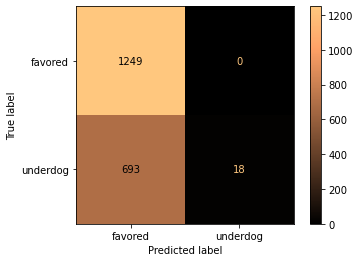

In [47]:
best_results(forest_grid_best4)

### Random Forest with PCA (3rd Iteration)

In [48]:
# # Creating parameters for GridSearch w/ PCA
# forest_params5 = {'pca__n_components': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
#                   'forest__n_estimators': [99, 100, 101],
#                   'forest__max_depth': [4, 5, 6]}
# # GridSearch with the random forest pipeline, parameters above, 5 fold cross validation, and precision score
# forest_grid5 = GridSearchCV(estimator=pca_forest_pipe, param_grid=forest_params5, cv=5, scoring=precision_scorer, n_jobs=3)
# # Fitting the GridSearch
# forest_grid5.fit(X_train, y_train)

# with open('../pickles/forest_grid_best5.pkl', 'wb') as f:
#      pickle.dump(forest_grid5.best_estimator_, f)

In [49]:
# Loading in pickled model
with open('../pickles/forest_grid_best5.pkl', 'rb') as f:
    forest_grid_best5 = pickle.load(f)

Best Model:  Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=11)),
                ('forest',
                 RandomForestClassifier(criterion='entropy', max_depth=6,
                                        n_estimators=99, random_state=333))]) 

CV Precision Score:  0.6533333333333333 

Training Precision Score:  1.0


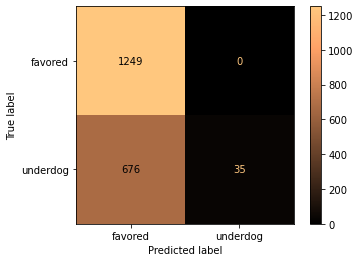

In [50]:
best_results(forest_grid_best5)

### Random Forest with PCA (4th Iteration)

In [51]:
# # Creating parameters for GridSearch w/ PCA
# forest_params6 = {'pca__n_components': [10, 11, 12],
#                   'forest__n_estimators': [95, 96, 97, 98, 99],
#                   'forest__max_depth': [6, 7, 8]}
# # GridSearch with the random forest pipeline, parameters above, 5 fold cross validation, and precision score
# forest_grid6 = GridSearchCV(estimator=pca_forest_pipe, param_grid=forest_params6, cv=5, scoring=precision_scorer, n_jobs=3)
# # Fitting the GridSearch
# forest_grid6.fit(X_train, y_train)

# with open('../pickles/forest_grid_best6.pkl', 'wb') as f:
#      pickle.dump(forest_grid6.best_estimator_, f)

In [52]:
# Loading in pickled model
with open('../pickles/forest_grid_best6.pkl', 'rb') as f:
    forest_grid_best6 = pickle.load(f)

Best Model:  Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=11)),
                ('forest',
                 RandomForestClassifier(criterion='entropy', max_depth=6,
                                        n_estimators=96, random_state=333))]) 

CV Precision Score:  0.6533333333333333 

Training Precision Score:  1.0


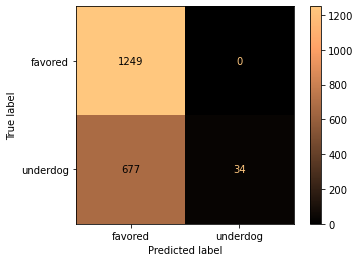

In [53]:
best_results(forest_grid_best6)

### Logistic Regression
I was unable to further improve the random forest model. Next I created a logistic regression model. First, without PCA then with PCA in a new pipeline.

In [54]:
# Creating steps for Pipeline
logreg_steps = [('scaler', StandardScaler()),
               ('logreg', LogisticRegression(random_state=333))]
# Feeding steps to Pipeline
logreg_pipe = Pipeline(logreg_steps)
# Fitting training data to the Pipeline
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(random_state=333))])

Something appeared to be wrong here. A precision score of 1.0 with a logistic regression that has all defualt hyperparameters doesn't seem right, even on the training data.

In [55]:
# Defining the predictions from the Pipeline using the training data
y_pred = logreg_pipe.predict(X_train)
# Evaluating the accuracy and precision score on the training data
print(f"Accuracy: ", accuracy_score(y_train, y_pred)) 
print(f"Precision: ", precision_score(y_train, y_pred, pos_label='underdog'))

Accuracy:  0.6377551020408163
Precision:  1.0


Displayed confusion matrix to get a better idea of what is happening here. The model only predicted one underdog to win and it was correct prediction resulting in the 1.0 precision score.

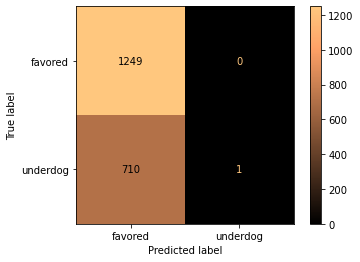

In [56]:
cf = confusion_matrix(y_train, y_pred)
ConfusionMatrixDisplay(cf, display_labels=['favored', 'underdog']).plot(cmap=plt.cm.copper)

Accuracy score was barely lower on the cross valuation.

In [57]:
# Calculating mean of the 5-fold cross_val_score on accuracy
print(f"CV accuracy: ", cross_val_score(logreg_pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

CV accuracy:  0.6362244897959183


This model almost never predicted an underdog to win and must've predicted incorrectly because the precision score is abysmal.

In [58]:
# Calculating mean of the 5-fold cross_val_score on precision
print(f"CV precision:", cross_val_score(logreg_pipe, X_train, y_train, cv=5, scoring=precision_scorer).mean())

CV precision: 0.06666666666666667


C:\Users\42ben\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\42ben\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\42ben\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression (2nd Iteration)
Tried to use a GridSearch to improve the logistic regression. Biggest concern is the class weights and regularization given the model never predicted an underdog to win.

In [59]:
# Creating parameters for GridSearch
logreg_params = {'logreg__penalty': ['l2', 'l1', 'elasticnet'],
                'logreg__C': [0.1, 1, 10],
                'logreg__class_weight': [{'favored': 1, 'underdog': 10}, 'balanced', None],
                'logreg__solver': ['lbfgs', 'sag', 'saga', 'newton-cholesky'],
                'logreg__max_iter': [100, 250]}
# Creating GridSearch with params above, cv=5, precision score, and logistic regression pipeline
logreg_grid = GridSearchCV(estimator=logreg_pipe, param_grid=logreg_params, cv=5, scoring=precision_scorer, n_jobs=3)
# Fitting the GridSearch
logreg_grid.fit(X_train, y_train)

C:\Users\42ben\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
630 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\42ben\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\42ben\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\42ben\anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(random_state=333))]),
             n_jobs=3,
             param_grid={'logreg__C': [0.1, 1, 10],
                         'logreg__class_weight': [{'favored': 1,
                                                   'underdog': 10},
                                                  'balanced', None],
                         'logreg__max_iter': [100, 250],
                         'logreg__penalty': ['l2', 'l1', 'elasticnet'],
                         'logreg__solver': ['lbfgs', 'sag', 'saga',
                                            'newton-cholesky']},
             scoring=make_scorer(precision_score, pos_label=underdog))

This was a massive improvement from only one GridSearch. The cross validation score went from ~7% to ~42%

In [60]:
# Printing the best estimator and best score
print(f"Best Model:", logreg_grid.best_estimator_)
print(f"CV Precision Score: ", logreg_grid.best_score_)

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', random_state=333,
                                    solver='saga'))])
CV Precision Score:  0.41604184150615814


This model barely overfit, in this regard much better than the random forest models. However it is much more underfit than the random forest models.

Training Precision Score: 0.4267578125


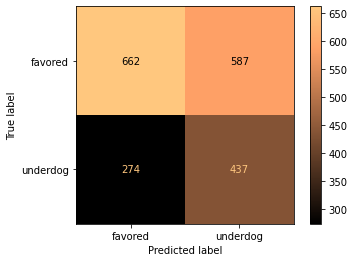

In [61]:
# Displaying the precison score on the training data
y_pred = logreg_grid.best_estimator_.predict(X_train)
print(f"Training Precision Score:", precision_score(y_train, y_pred, pos_label='underdog'))
cf = confusion_matrix(y_train, y_pred)
ConfusionMatrixDisplay(cf, display_labels=['favored', 'underdog']).plot(cmap=plt.cm.copper);

### Logistic Regression (3rd Iteration)

Kept most of the same hyperparameters from the best estimator above. Mostly seeing if more regularization by decreasing C will produce a better model.

In [62]:
# Creating parameters for GridSearch
logreg_params2 = {'logreg__penalty': ['l1'],
                'logreg__C': [0.1, 0.01, 0.001],
                'logreg__class_weight': ['balanced', None],
                'logreg__solver': ['saga'],
                'logreg__max_iter': [100, 500]}
# Creating GridSearch with params above, cv=5, precision score, and logistic regression pipeline
logreg_grid2 = GridSearchCV(estimator=logreg_pipe, param_grid=logreg_params2, cv=5, scoring=precision_scorer, n_jobs=3)
# Fitting the GridSearch
logreg_grid2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(random_state=333))]),
             n_jobs=3,
             param_grid={'logreg__C': [0.1, 0.01, 0.001],
                         'logreg__class_weight': ['balanced', None],
                         'logreg__max_iter': [100, 500],
                         'logreg__penalty': ['l1'],
                         'logreg__solver': ['saga']},
             scoring=make_scorer(precision_score, pos_label=underdog))

The best estimator remained the same.

In [63]:
# Printing the best estimator and best score
print(f"Best Model:", logreg_grid2.best_estimator_)
print(f"CV Precision Score: ", logreg_grid2.best_score_)

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', random_state=333,
                                    solver='saga'))])
CV Precision Score:  0.41604184150615814


### Logistic Regression with Polynomial Features
I created a new pipeline that included PolynomialFeatures in the steps. The previous logistic regression models are underfit so I am trying to improve this by adding complexity with polynomials.

In [64]:
# Creating steps for Pipeline
logreg_steps2 = [('scaler', StandardScaler()),
                ('poly', PolynomialFeatures()),
               ('logreg', LogisticRegression(random_state=333, penalty='l1', C=0.1, solver='saga',
                                            class_weight='balanced', max_iter=5000))]
# Feeding steps to Pipeline
logreg_pipe2 = Pipeline(logreg_steps2)
# Fitting training data to the Pipeline
logreg_pipe2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('logreg',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=5000, penalty='l1',
                                    random_state=333, solver='saga'))])

Polynomials can get out of hand quickly so I started with only two options: 2 and 3.

In [65]:
# # Creating parameters for GridSearch
# logreg_params3 = {'poly__degree': [2, 3]}
# # Creating GridSearch with params above, cv=5, precision score, and logistic regression pipeline
# logreg_grid3 = GridSearchCV(estimator=logreg_pipe2, param_grid=logreg_params3, cv=5, scoring=precision_scorer, n_jobs=3)
# # Fitting the GridSearch
# logreg_grid3.fit(X_train, y_train)
# # Pickling model
# with open('pickles/logreg_grid_best3.pkl', 'wb') as f:
#       pickle.dump(logreg_grid3.best_estimator_, f)

Pickled this model because it can take long with the GridSearch.

In [66]:
# Loading in pickled model
with open('../pickles/logreg_grid_best3.pkl', 'rb') as f:
    logreg_grid_best3 = pickle.load(f)

The cross validation score increased ever so slightly. This showed it became a bit more overfit but not much. This is expected when increasing complexity.

Best Model:  Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('logreg',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=5000, penalty='l1',
                                    random_state=333, solver='saga'))]) 

CV Precision Score:  0.4175616759222973 

Training Precision Score:  0.44334160463192723


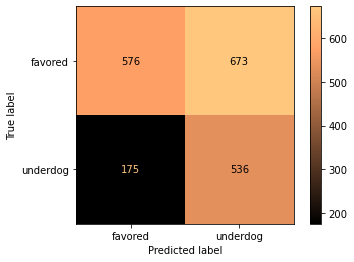

In [67]:
best_results(logreg_grid_best3)

### Logistic Regression with Polynomial Features (2nd Iteration)
Wanted to see if increasing the polynomials will help.

In [68]:
# # Creating parameters for GridSearch
# logreg_params4 = {'poly__degree': [3, 4]}
# # Creating GridSearch with params above, cv=5, precision score, and logistic regression pipeline
# logreg_grid4 = GridSearchCV(estimator=logreg_pipe2, param_grid=logreg_params4, cv=5, scoring=precision_scorer, n_jobs=3)
# # Fitting the GridSearch
# logreg_grid4.fit(X_train, y_train)
# # Pickling model
# with open('pickles/logreg_grid_best4.pkl', 'wb') as f:
#       pickle.dump(logreg_grid4.best_estimator_, f)

Pickled this model because it takes a long time to run.

In [69]:
# Loading in pickled model
with open('../pickles/logreg_grid_best4.pkl', 'rb') as f:
    logreg_grid_best4 = pickle.load(f)

This improved the cross validation precision score by less than 1% and was very computationally expensive. As expected with increased complexity it also became slightly more overfit but, still not much. Because these models are taking a long time to run and improving minimally I'm going to move on to a new model. 

Best Model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=4)),
                ('logreg',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=5000, penalty='l1',
                                    random_state=333, solver='saga'))]) 

CV Precision Score:  0.42180077030812324 

Training Precision Score:  0.4606413994169096


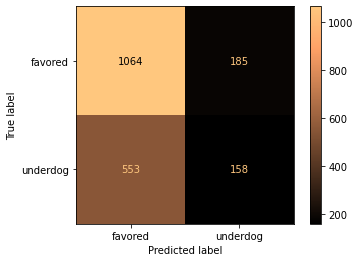

In [70]:
best_results(logreg_grid_best4)

### GradientBoostingClassifier
Next, I decided to try and build a better model using the GradientBoostingClassifier. First I created a new Pipeline and ran the model with all defualt hyperparameters.

In [71]:
# Creating steps for a Pipeline
gradient_boost_steps = [('scaler', StandardScaler()),
                        ('GradBoost', GradientBoostingClassifier(random_state=333))]
# Feeding steps to Pipeline
gradient_boost_pipe = Pipeline(gradient_boost_steps)
# Fitting training data to the Pipeline
gradient_boost_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('GradBoost', GradientBoostingClassifier(random_state=333))])

This was a good score on the training data the cross validation score is much lower, it is overfit. This is a decent precision score though. I wanted to see if I could improve this model.

In [72]:
# Defining the predictions from the Pipeline using the training data
y_pred = gradient_boost_pipe.predict(X_train)
# Evaluating the accuracy and precision score on the training data
print(f"Accuracy: ", accuracy_score(y_train, y_pred), '\n')
print(f"Precision: ", precision_score(y_train, y_pred, pos_label='underdog'),'\n')

# Calculating mean of the 5-fold cross_val_score on precision
print(f"CV Precision Score:", cross_val_score(gradient_boost_pipe, X_train, y_train, cv=5, scoring=precision_scorer).mean())

Accuracy:  0.7535714285714286 

Precision:  0.8774834437086093 

CV Precision Score: 0.46213569857637654


### GradientBoostingClassifier with RandomizedSearch (2nd Iteration)
I decided to use RandomizedSearch to begin because it is much more efficient and there are a lot of hyperparameters I could tweak on a GradientBoostingClassifier.

In [73]:
# # Setting params for RandomizedSearch
# gradient_boost_params = {'GradBoost__learning_rate': [0.001, 0.01, 0.1, 1, 10],
#                         'GradBoost__n_estimators': [50, 100, 150, 200],
#                         'GradBoost__min_samples_leaf': [2, 4, 8],
#                         'GradBoost__loss': ['log_loss', 'exponential'],
#                         'GradBoost__max_depth': [None, 50, 200]}
# # Creating the RandomizedSearch
# gradient_boost_grid = RandomizedSearchCV(gradient_boost_pipe, param_distributions=gradient_boost_params, 
#                                          scoring=precision_scorer, cv=5, random_state=333, n_iter=20, n_jobs=3)
# # Fitting the RandomizedSearch
# gradient_boost_grid.fit(X_train, y_train)

# # Pickling this model
# with open('pickles/gradient_boost_grid_best.pkl', 'wb') as f:
#        pickle.dump(gradient_boost_grid.best_estimator_, f)

I pickled this model because it takes a couple minutes to run.

In [74]:
# Loading in pickled model
with open('../pickles/gradient_boost_grid_best.pkl', 'rb') as f:
    gradient_boost_grid_best = pickle.load(f)

The precision score remained close to the same but is a tiny bit better. Now the model is even more overfit to the training data.

Best Model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('GradBoost',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            loss='exponential', max_depth=50,
                                            min_samples_leaf=8,
                                            n_estimators=150,
                                            random_state=333))]) 

CV Precision Score:  0.4627798679598586 

Training Precision Score:  1.0


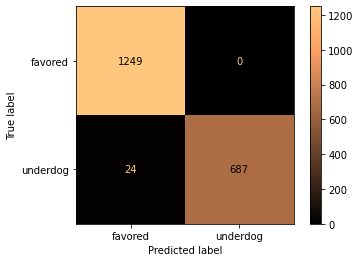

In [75]:
best_results(gradient_boost_grid_best)

### GradientBoostingClassifier with GridSearch (3rd Iteration)
After I ran the RandomizedGridSearch I had an idea of where to start so I decided to use a GridSearch instead of a RandomizedGridSearch this time.

In [76]:
# # Setting params for GridSearch
# gradient_boost_params2 = {'GradBoost__learning_rate': [0.001, 0.01, 0.1],
#                         'GradBoost__n_estimators': [125, 150, 175],
#                         'GradBoost__min_samples_leaf': [8, 10],
#                         'GradBoost__loss': ['log_loss', 'exponential'],
#                         'GradBoost__max_depth': [25, 50, 100]}
# # Creating the GridSearch
# gradient_boost_grid2 = GridSearchCV(gradient_boost_pipe, param_grid=gradient_boost_params2, cv=5, scoring=precision_scorer,
#                                    n_jobs=3)
# # Fitting the GridSearch
# gradient_boost_grid2.fit(X_train, y_train)

# # Pickling model
# with open('pickles/gradient_boost_grid_best2.pkl', 'wb') as f:
#        pickle.dump(gradient_boost_grid2.best_estimator_, f)

Pickled this model because it takes a long time to run.

In [77]:
# Loading in pickled model
with open('../pickles/gradient_boost_grid_best2.pkl', 'rb') as f:
    gradient_boost_grid_best2 = pickle.load(f)

This barely increased the precision score and the hyperparameters remained nearly the same as well. It is still a very overfit model too.

Best Model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('GradBoost',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            loss='exponential', max_depth=50,
                                            min_samples_leaf=8,
                                            n_estimators=125,
                                            random_state=333))]) 

CV Precision Score:  0.47872318790529905 

Training Precision Score:  1.0


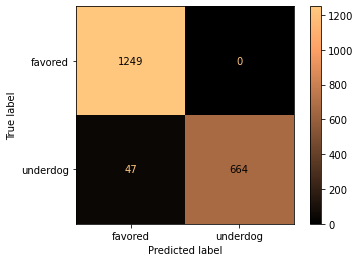

In [78]:
best_results(gradient_boost_grid_best2)

### GradientBoostingClassifier  with GridSearch (4th Iteration)

In [79]:
# # Setting params for GridSearch
# gradient_boost_params3 = {'GradBoost__learning_rate': [0.01],
#                         'GradBoost__n_estimators': [100, 105, 110, 115, 120, 125, 130, 135, 140],
#                         'GradBoost__min_samples_leaf': [7, 8, 9],
#                         'GradBoost__loss': ['exponential'],
#                         'GradBoost__max_depth': [30, 35, 40, 45, 50, 55, 60, 65, 70]}
# # Creating the GridSearch
# gradient_boost_grid3 = GridSearchCV(gradient_boost_pipe, param_grid=gradient_boost_params3, cv=5, scoring=precision_scorer,
#                                    n_jobs=3)
# # Fitting the GridSearch
# gradient_boost_grid3.fit(X_train, y_train)

# # Pickling model
# with open('../pickles/gradient_boost_grid_best3.pkl', 'wb') as f:
#        pickle.dump(gradient_boost_grid3.best_estimator_, f)

In [80]:
# Loading in pickled model
with open('../pickles/gradient_boost_grid_best3.pkl', 'rb') as f:
    gradient_boost_grid_best3 = pickle.load(f)

Best Model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('GradBoost',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            loss='exponential', max_depth=35,
                                            min_samples_leaf=7,
                                            n_estimators=110,
                                            random_state=333))]) 

CV Precision Score:  0.48505086278928927 

Training Precision Score:  1.0


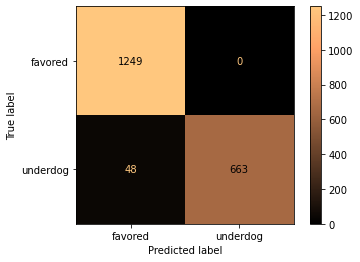

In [81]:
best_results(gradient_boost_grid_best3)

### GradientBoostingClassifier with GridSearch (5th Iteration)

In [82]:
# # Setting params for GridSearch
# gradient_boost_params4 = {'GradBoost__learning_rate': [0.01],
#                         'GradBoost__n_estimators': [10, 50, 100, 110, 111, 112, 113, 114],
#                         'GradBoost__min_samples_leaf': [7, 8, 9],
#                         'GradBoost__loss': ['exponential'],
#                         'GradBoost__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
# # Creating the GridSearch
# gradient_boost_grid4 = GridSearchCV(gradient_boost_pipe, param_grid=gradient_boost_params4, cv=5, scoring=precision_scorer,
#                                    n_jobs=3)
# # Fitting the GridSearch
# gradient_boost_grid4.fit(X_train, y_train)

# # Pickling model
# with open('../pickles/gradient_boost_grid_best4.pkl', 'wb') as f:
#        pickle.dump(gradient_boost_grid4.best_estimator_, f)

In [83]:
# Loading in pickled model
with open('../pickles/gradient_boost_grid_best4.pkl', 'rb') as f:
    gradient_boost_grid_best4 = pickle.load(f)

Best Model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('GradBoost',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            loss='exponential', max_depth=8,
                                            min_samples_leaf=7, n_estimators=50,
                                            random_state=333))]) 

CV Precision Score:  0.7766666666666666 

Training Precision Score:  0.9666666666666667


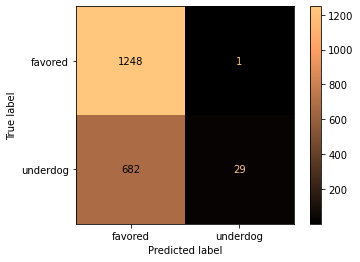

In [84]:
best_results(gradient_boost_grid_best4)

### GradientBoostingClassifier with GridSearch (6th Iteration)

In [85]:
# # Setting params for GridSearch
# gradient_boost_params5 = {'GradBoost__learning_rate': [0.01],
#                         'GradBoost__n_estimators': [46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 60, 65, 70, 75, 80, 85, 90, 95],
#                         'GradBoost__min_samples_leaf': [5, 6, 7, 8],
#                         'GradBoost__loss': ['exponential'],
#                         'GradBoost__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
# # Creating the GridSearch
# gradient_boost_grid5 = GridSearchCV(gradient_boost_pipe, param_grid=gradient_boost_params5, cv=5, scoring=precision_scorer,
#                                    n_jobs=3)
# # Fitting the GridSearch
# gradient_boost_grid5.fit(X_train, y_train)

# # Pickling model
# with open('../pickles/gradient_boost_grid_best5.pkl', 'wb') as f:
#        pickle.dump(gradient_boost_grid5.best_estimator_, f)

In [86]:
# Loading in pickled model
with open('../pickles/gradient_boost_grid_best5.pkl', 'rb') as f:
    gradient_boost_grid_best5 = pickle.load(f)

Best Model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('GradBoost',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            loss='exponential', max_depth=8,
                                            min_samples_leaf=7, n_estimators=50,
                                            random_state=333))]) 

CV Precision Score:  0.7766666666666666 

Training Precision Score:  0.9666666666666667


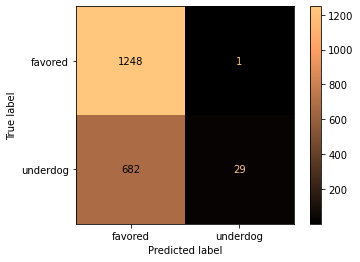

In [87]:
best_results(gradient_boost_grid_best5)

### Neural Network
When PolyNomial features were added it did not improve the model. I decided to move on to a neural network model. I started with a new Pipeline.

In [88]:
# Creating steps for Pipeline
mlpc_steps = mlpc_steps = [('scaler', StandardScaler()),
                           ('mlpc', MLPClassifier(random_state=333, max_iter=2000))]
# Feeding steps into Pipeline
mlpc_pipe = Pipeline(mlpc_steps)
# Fitting the Pipeline
mlpc_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlpc', MLPClassifier(max_iter=2000, random_state=333))])

Another good score on the training data.

In [89]:
# Evaluating the accuracy and precision score on the training data
y_pred = mlpc_pipe.predict(X_train)
accuracy_score(y_train, y_pred), precision_score(y_train, y_pred, pos_label='underdog')

(0.8658163265306122, 0.8696369636963697)

But once again it is overfitting to the training data.

In [90]:
cross_val_score(mlpc_pipe, X_train, y_train, cv=5, scoring=precision_scorer, n_jobs=3).mean()

0.38591074681238613

### Neural Network with RandomizedSearch (2nd Iteration)
I tried to improve the nerual network model with a RandomizedSearch. Chose to begin with a RandomizedSearch because it is more efficient and I have a lot of hyperparameters to explore.

In [91]:
# # Setting parameters for RandomizedSearch
# mlpc_params = {'mlpc__hidden_layer_sizes': [(10,), (50,), (100,), (200,), (500,)],
#               'mlpc__activation': ['relu', 'logistic', 'tanh'],
#               'mlpc__solver': ['sgd', 'adam', 'lbfgs'],
#               'mlpc__alpha': [0.00001, 0.0001, 0.001, 0.01],
#               'mlpc__learning_rate': ['constant', 'adaptive']}
# # Creating RandomizedSearch
# mlpc_grid = RandomizedSearchCV(mlpc_pipe, param_distributions=mlpc_params, cv=5, n_iter=50, scoring=precision_scorer,
#                               n_jobs=3)
# # Fitting RandomizedSearch
# mlpc_grid.fit(X_train, y_train)

# # Pickling model
# with open('pickles/mlpc_grid_best.pkl', 'wb') as f:
#        pickle.dump(mlpc_grid.best_estimator_, f)

In [92]:
# Loading in pickled model
with open('../pickles/mlpc_grid_best.pkl', 'rb') as f:
    mlpc_grid_best = pickle.load(f)

This was a major improvement from the previous precision score of ~39% it is also less overfit than before.

Best Model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('mlpc',
                 MLPClassifier(alpha=0.001, hidden_layer_sizes=(500,),
                               learning_rate='adaptive', max_iter=2000,
                               random_state=333, solver='sgd'))]) 

CV Precision Score:  0.5333333333333333 

Training Precision Score:  0.7272727272727273


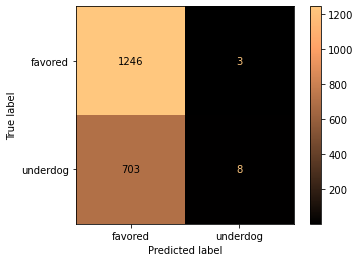

In [93]:
# Printing best estimator and best score
best_results(mlpc_grid_best)

### Nueral Network with RandomizedSearch (3rd Iteration)
I wanted to see if I could improve the model even more based off the last RandomizedSearch.

In [94]:
# # Setting parameters for RandomizedSearch
# mlpc_params2 = {'mlpc__hidden_layer_sizes': [(350,), (500,), (700,), (1000,)],
#               'mlpc__activation': ['relu'],
#               'mlpc__solver': ['sgd', 'adam', 'lbfgs'],
#               'mlpc__alpha': [0.001, 0.01, 0.1, 1],
#               'mlpc__learning_rate': ['constant', 'adaptive']}
# # Creating RandomizedSearch
# mlpc_grid2 = RandomizedSearchCV(mlpc_pipe, param_distributions=mlpc_params2, cv=5, n_iter=50, scoring=precision_scorer,
#                               n_jobs=3)
# # Fitting RandomizedSearch
# mlpc_grid2.fit(X_train, y_train)

# # Pickling model
# with open('pickles/mlpc_grid_best2.pkl', 'wb') as f:
#        pickle.dump(mlpc_grid2.best_estimator_, f)

Pickled this model because it takes a long time to run.

In [95]:
# Loading in pickled model
with open('../pickles/mlpc_grid_best2.pkl', 'rb') as f:
    mlpc_grid_best2 = pickle.load(f)

This improved the CV score by about 2% and it became more overfit to the training data.

Best Model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('mlpc',
                 MLPClassifier(alpha=1, hidden_layer_sizes=(500,),
                               learning_rate='adaptive', max_iter=2000,
                               random_state=333, solver='sgd'))]) 

CV Precision Score:  0.5533333333333333 

Training Precision Score:  0.7857142857142857


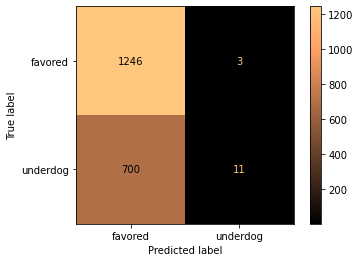

In [96]:
best_results(mlpc_grid_best2)

### Neural Network with GridSearch (4th Iteration)

After the RandomSearches I had a better idea of how to tune the hyperparameters. Decided to always keep activation='relu', learning_rate='adaptive', and solver='sgd' because those were consistently the best. Focused more on dialing in hidden_layer_sizes and alpha to improve the model.

In [97]:
# # Setting parameters for GridSearch
# mlpc_params3 = {'mlpc__hidden_layer_sizes': [(450,), (500,), (550,)],
#                'mlpc__solver': ['sgd'],
#                'mlpc__alpha': [0.1, 1, 10],
#                'mlpc__learning_rate': ['adaptive']}
# # Creating GridSearch
# mlpc_grid3 = GridSearchCV(mlpc_pipe, param_grid=mlpc_params3, cv=5, scoring=precision_scorer, n_jobs=3)
# # Fitting GridSearch
# mlpc_grid3.fit(X_train, y_train)

# # Pickling model
# with open('../pickles/mlpc_grid_best3.pkl', 'wb') as f:
#         pickle.dump(mlpc_grid3.best_estimator_, f)

Pickled this model because it takes a long time to run.

In [98]:
# Loading in pickled model
with open('../pickles/mlpc_grid_best3.pkl', 'rb') as f:
    mlpc_grid_best3 = pickle.load(f)

Best Model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('mlpc',
                 MLPClassifier(alpha=1, hidden_layer_sizes=(550,),
                               learning_rate='adaptive', max_iter=2000,
                               random_state=333, solver='sgd'))]) 

CV Precision Score:  0.75 

Training Precision Score:  1.0


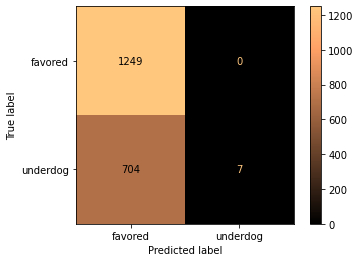

In [99]:
best_results(mlpc_grid_best3)

### Neural Network with GridSearch (5th Iteration)

In [100]:
# # Setting parameters for GridSearch
# mlpc_params4 = {'mlpc__hidden_layer_sizes': [(530,), (535,), (540,), (545,), (550,), (555,), (560,), (565,), (570,)],
#                'mlpc__solver': ['sgd'],
#                'mlpc__alpha': [1],
#                'mlpc__learning_rate': ['adaptive']}
# # Creating GridSearch
# mlpc_grid4 = GridSearchCV(mlpc_pipe, param_grid=mlpc_params4, cv=5, scoring=precision_scorer, n_jobs=3)
# # Fitting GridSearch
# mlpc_grid4.fit(X_train, y_train)

# # Pickling model
# with open('../pickles/mlpc_grid_best4.pkl', 'wb') as f:
#         pickle.dump(mlpc_grid4.best_estimator_, f)

In [101]:
# Loading in pickled model
with open('../pickles/mlpc_grid_best4.pkl', 'rb') as f:
    mlpc_grid_best4 = pickle.load(f)

Best Model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('mlpc',
                 MLPClassifier(alpha=1, hidden_layer_sizes=(545,),
                               learning_rate='adaptive', max_iter=2000,
                               random_state=333, solver='sgd'))]) 

CV Precision Score:  0.8 

Training Precision Score:  0.8125


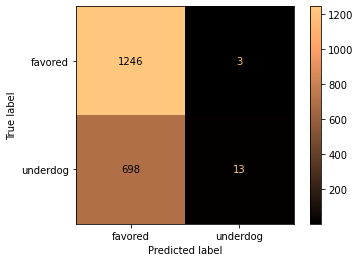

In [102]:
best_results(mlpc_grid_best4)

### Neural Network with GridSearch (6th Iteration)

In [103]:
# # Setting parameters for GridSearch
# mlpc_params5 = {'mlpc__hidden_layer_sizes': [(541,), (542,), (543,), (544,), (545,), (546,), (547,), (548,), (549,)],
#                'mlpc__solver': ['sgd'],
#                'mlpc__alpha': [1],
#                'mlpc__learning_rate': ['adaptive']}
# # Creating GridSearch
# mlpc_grid5 = GridSearchCV(mlpc_pipe, param_grid=mlpc_params5, cv=5, scoring=precision_scorer, n_jobs=3)
# # Fitting GridSearch
# mlpc_grid5.fit(X_train, y_train)

# # Pickling model
# with open('../pickles/mlpc_grid_best5.pkl', 'wb') as f:
#         pickle.dump(mlpc_grid5.best_estimator_, f)

In [104]:
# Loading in pickled model
with open('../pickles/mlpc_grid_best5.pkl', 'rb') as f:
    mlpc_grid_best5 = pickle.load(f)

Best Model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('mlpc',
                 MLPClassifier(alpha=1, hidden_layer_sizes=(545,),
                               learning_rate='adaptive', max_iter=2000,
                               random_state=333, solver='sgd'))]) 

CV Precision Score:  0.8 

Training Precision Score:  0.8125


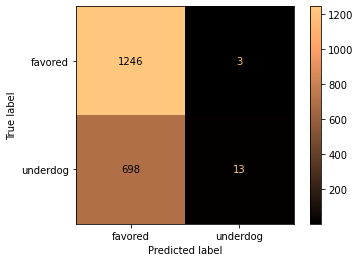

In [105]:
best_results(mlpc_grid_best5)

### Stacking Classifier

In [106]:
# Creating estimators for StackingClassifier
estimators = [('GradBoost', GradientBoostingClassifier(learning_rate=0.01,
                                                       loss='exponential', 
                                                       max_depth=50,
                                                       min_samples_leaf=8,
                                                       n_estimators=125,
                                                       random_state=333)),
              ('mlpc', MLPClassifier(alpha=1, 
                                     hidden_layer_sizes=(545,),
                                     learning_rate='adaptive', 
                                     max_iter=2000,
                                     random_state=333, 
                                     solver='sgd'))]
# Creating steps for StackingClassifier Pipeline
sc_steps = [('scaler', StandardScaler()),
           ('sc', StackingClassifier(estimators=estimators, n_jobs=3))]
# Feeding steps to Pipeline
sc_pipe = Pipeline(sc_steps)
# Fitting Pipeline to training data
sc_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sc',
                 StackingClassifier(estimators=[('GradBoost',
                                                 GradientBoostingClassifier(learning_rate=0.01,
                                                                            loss='exponential',
                                                                            max_depth=50,
                                                                            min_samples_leaf=8,
                                                                            n_estimators=125,
                                                                            random_state=333)),
                                                ('mlpc',
                                                 MLPClassifier(alpha=1,
                                                               hidden_layer_sizes=(545,),
                                                               learning_rate='adaptive',
                                                               max_iter=2000,
                                                               random_state=333,
                                                               solver='sgd'))],
                                    n_jobs=3))])

CV Precision Score:  0.65 

Training Precision Score:  1.0


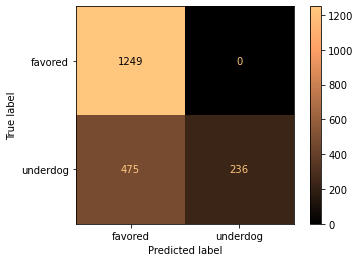

In [147]:
# Printing the CV precision
print(f"CV Precision Score: ", cross_val_score(sc_pipe, X_train, y_train, scoring=precision_scorer, cv=5, n_jobs=3).mean(), '\n')

# Creating predictions from sc_pipe
y_pred = sc_pipe.predict(X_train)

# Printing the training precision score
print(f"Training Precision Score: ", precision_score(y_train, y_pred, pos_label='underdog'))

# Creating confusion matrix with training data
cf = confusion_matrix(y_train, y_pred)
ConfusionMatrixDisplay(cf, display_labels=['favored', 'underdog']).plot(cmap=plt.cm.copper);

### Exploring custom threshold

In [108]:
y_pred = sc_pipe.predict(X_train)
y_prob = sc_pipe.predict_proba(X_train)

In [109]:
probs = pd.DataFrame({'prob_favored': y_prob[:, 0], 'prob_underdog': y_prob[:, 1], 'prediction': y_pred, 'winner': y_train, 
                      'B_odds': X_train['B_odds'], 'R_odds': X_train['R_odds']})

In [110]:
probs

,prob_favored,prob_underdog,prediction,winner,B_odds,R_odds
2792,0.640549,0.359451,favored,favored,-135,115.0
2737,0.460378,0.539622,underdog,underdog,130,-150.0
1831,0.703093,0.296907,favored,favored,-400,325.0
3743,0.709185,0.290815,favored,favored,225,-245.0
2583,0.703045,0.296955,favored,favored,210,-250.0
...,...,...,...,...,...,...
2260,0.742974,0.257026,favored,favored,150,-170.0
3040,0.724612,0.275388,favored,favored,180,-220.0
2337,0.778205,0.221795,favored,favored,325,-400.0
1675,0.601024,0.398976,favored,favored,105,-125.0


In [111]:
underdog_probs = probs.loc[probs['prediction'] == 'underdog']
underdog_probs['B_odds'].value_counts()

-140    14
-120    13
 130    11
-155    11
-160    10
 125    10
 120    10
-145    10
-150    10
-165     8
-110     8
-125     8
 105     8
 100     8
-175     7
-105     7
-170     6
 135     6
 110     6
-130     6
-115     6
-135     6
 115     5
 145     5
-210     4
-200     4
 140     3
-230     3
-185     3
-190     2
-109     1
-360     1
 123     1
-350     1
-240     1
-132     1
-134     1
 155     1
 158     1
 160     1
-162     1
 165     1
 175     1
 129     1
 164     1
-220     1
 225     1
-330     1
Name: B_odds, dtype: int64

In [112]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [113]:
prob_thresh_4645 = probs.loc[(probs['prob_underdog'] >= .48) & (probs['prediction'] == 'favored')]

In [114]:
prob_thresh_4645['B_odds'].max()

187

In [115]:
prob_thresh_4645['R_odds'].max()

270.0

In [116]:
probs

,prob_favored,prob_underdog,prediction,winner,B_odds,R_odds
2792,0.640549,0.359451,favored,favored,-135,115.0
2737,0.460378,0.539622,underdog,underdog,130,-150.0
1831,0.703093,0.296907,favored,favored,-400,325.0
3743,0.709185,0.290815,favored,favored,225,-245.0
2583,0.703045,0.296955,favored,favored,210,-250.0
4022,0.479968,0.520032,underdog,underdog,-155,145.0
3224,0.678694,0.321306,favored,favored,400,-450.0
136,0.640002,0.359998,favored,favored,-150,120.0
2524,0.701075,0.298925,favored,favored,135,-155.0
3076,0.506782,0.493218,favored,underdog,115,-135.0


In [134]:
predictions = sc_pipe.predict_proba(X_train)
y_pred = np.where(predictions[:,1] >= 0.48, 'underdog', 'favored')
y_pred

array(['favored', 'underdog', 'favored', ..., 'favored', 'favored',
       'favored'], dtype='<U8')

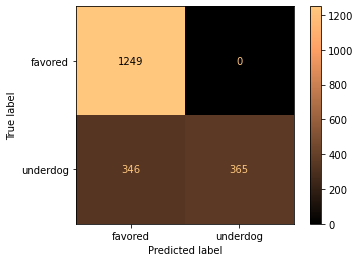

In [135]:
cf = confusion_matrix(y_train, y_pred)
ConfusionMatrixDisplay(cf, display_labels=['favored', 'underdog']).plot(cmap=plt.cm.copper);

### Creating function for CV with custom thresholds

In [119]:
 """
    Calculate precision score with a custom threshold for binary classification.

    This function takes the true labels, predicted probabilities, and a threshold value
    to classify predictions as 'underdog' or 'favored'. It then calculates the precision
    score for the 'underdog' class.

    Parameters:
    - y_true: True binary labels.
    - y_pred: Predicted probabilities.
    - thresh: Threshold value for classification.

    Returns:
    - precision: Precision score for the 'underdog' class.
    """
    
def threshold_score(y_true, y_pred, thresh):
    y_pred_list = ['underdog' if x >= thresh else 'favored' for x in y_pred]
    return precision_score(y_true, y_pred_list, pos_label='underdog')

### CV with threshold of 0.48

In [120]:
# Defining custom threshold
custom_thresh=0.48
# Custom scorer with threshold as parameter
thresh_scorer = make_scorer(threshold_score, needs_proba=True, thresh=custom_thresh)

In [121]:
cross_val_score(sc_pipe, X_train, y_train, cv=5, scoring=thresh_scorer, n_jobs=3).mean()

0.6466666666666666

### CV with Threshold of 0.47

In [122]:
# Defining custom threshold
custom_thresh=0.47
# Custom scorer with threshold as parameter
thresh_scorer = make_scorer(threshold_score, needs_proba=True, thresh=custom_thresh)

In [123]:
cross_val_score(sc_pipe, X_train, y_train, cv=5, scoring=thresh_scorer, n_jobs=3).mean()

0.5625287356321839

### CV with Threshold of 0.475

In [124]:
# Defining custom threshold
custom_thresh=0.475
# Custom scorer with threshold as parameter
thresh_scorer = make_scorer(threshold_score, needs_proba=True, thresh=custom_thresh)

In [125]:
cross_val_score(sc_pipe, X_train, y_train, cv=5, scoring=thresh_scorer, n_jobs=3).mean()

0.5875871954132824

### CV with Threshold of 0.478

In [126]:
# Defining custom threshold
custom_thresh=0.478
# Custom scorer with threshold as parameter
thresh_scorer = make_scorer(threshold_score, needs_proba=True, thresh=custom_thresh)

In [127]:
cross_val_score(sc_pipe, X_train, y_train, cv=5, scoring=thresh_scorer, n_jobs=3).mean()

0.5902597402597403

### CV with threshold of 0.4645 (lowest could go on training data without creating false positives)

In [128]:
custom_thresh = 0.4645
thresh_scorer = make_scorer(threshold_score, needs_proba=True, thresh=custom_thresh)

In [129]:
cross_val_score(sc_pipe, X_train, y_train, cv=5, scoring=thresh_scorer, n_jobs=3).mean()

0.505079365079365

### Final Model

In [130]:
sc_pipe.named_steps.sc.final_estimator_.coef_

array([[1.19634281, 2.39894509]])

In [131]:
y_pred = sc_pipe.predict(X_test)
precision_score(y_test, y_pred, pos_label='underdog')

0.75

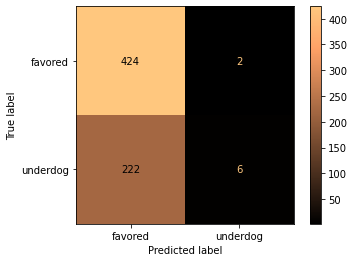

In [132]:
cf = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cf, display_labels=['favored', 'underdog']).plot(cmap=plt.cm.copper);

If you bet 100 dollars on every predicted underdog you would profit 555 dollars.

In [145]:
probs2.loc[probs2['prediction'] == 'underdog']

,prob_favored,prob_underdog,prediction,winner,B_odds,R_odds
2003,0.489513,0.510487,underdog,underdog,-155,135.0
1709,0.488126,0.511874,underdog,underdog,135,-155.0
2082,0.480612,0.519388,underdog,underdog,125,-145.0
2197,0.479675,0.520325,underdog,favored,-130,100.0
1354,0.473540,0.526460,underdog,favored,-110,-110.0
3025,0.483883,0.516117,underdog,underdog,-155,135.0
2186,0.477274,0.522726,underdog,underdog,-115,-105.0
1917,0.466100,0.533900,underdog,underdog,130,-150.0


In [139]:
predictions = sc_pipe.predict_proba(X_test)
y_pred = np.where(predictions[:,1] >= 0.48, 'underdog', 'favored')
y_pred

array(['favored', 'favored', 'favored', 'favored', 'favored', 'favored',
       'favored', 'underdog', 'favored', 'favored', 'favored', 'favored',
       'favored', 'favored', 'favored', 'favored', 'favored', 'favored',
       'favored', 'favored', 'favored', 'favored', 'favored', 'favored',
       'favored', 'favored', 'favored', 'favored', 'favored', 'favored',
       'favored', 'favored', 'favored', 'favored', 'underdog', 'favored',
       'favored', 'favored', 'favored', 'favored', 'favored', 'favored',
       'favored', 'favored', 'favored', 'favored', 'favored', 'favored',
       'favored', 'favored', 'favored', 'favored', 'favored', 'favored',
       'favored', 'favored', 'favored', 'favored', 'favored', 'favored',
       'favored', 'favored', 'favored', 'favored', 'favored', 'favored',
       'favored', 'favored', 'favored', 'favored', 'favored', 'favored',
       'favored', 'favored', 'favored', 'favored', 'favored', 'favored',
       'favored', 'favored', 'favored', 'favored'

In [140]:
precision_score(y_test, y_pred, pos_label='underdog')

0.4827586206896552

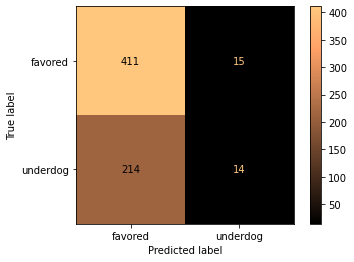

In [141]:
cf = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cf, display_labels=['favored', 'underdog']).plot(cmap=plt.cm.copper);

In [142]:
y_pred = sc_pipe.predict(X_test)
y_prob = sc_pipe.predict_proba(X_test)

In [143]:
probs2 = pd.DataFrame({'prob_favored': y_prob[:, 0], 'prob_underdog': y_prob[:, 1], 'prediction': y_pred, 'winner': y_test, 
                      'B_odds': X_test['B_odds'], 'R_odds': X_test['R_odds']})

If you bet 100 dollars on every predicted underdog you would make a profit of $170.

In [144]:
probs2.loc[probs2['prob_underdog'] >= 0.48]

,prob_favored,prob_underdog,prediction,winner,B_odds,R_odds
2003,0.489513,0.510487,underdog,underdog,-155,135.0
3035,0.509858,0.490142,favored,underdog,120,-130.0
3878,0.510121,0.489879,favored,underdog,-110,100.0
2370,0.519408,0.480592,favored,underdog,-125,105.0
4177,0.516152,0.483848,favored,favored,105,-115.0
2993,0.515776,0.484224,favored,favored,-105,-115.0
2005,0.504653,0.495347,favored,underdog,-210,175.0
1709,0.488126,0.511874,underdog,underdog,135,-155.0
2855,0.515777,0.484223,favored,favored,-150,130.0
679,0.510010,0.489990,favored,favored,110,-130.0
